In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import ggplot as ggplot

ModuleNotFoundError: No module named 'ggplot'

In [17]:
#read new combined cleaned dataset
df = pd.read_csv("..\Project 1\WSB Data\wsb.csv", index_col=0)

In [18]:
#sort by num_mentions rolled up into ticker
df_num_mentions =df.sort_values(["num_mentions","ticker"],ascending=False).groupby("ticker")
df_num_mentions = df.groupby('ticker')['num_mentions'].sum().sort_values(ascending=False)
df_num_mentions.head(20)

#df_num_mentions.to_csv('test.csv')

ticker
GME     122643
BB       41669
AMC      38061
PLTR     20785
CLOV     15889
WISH     10965
SPY      10823
RKT      10520
TSLA     10194
CLNE      8252
NOK       8133
UWMC      6239
AMD       5620
TLRY      5362
SNDL      5133
AAPL      5040
WKHS      4565
MVIS      4465
NIO       4198
ALL       4063
Name: num_mentions, dtype: int64

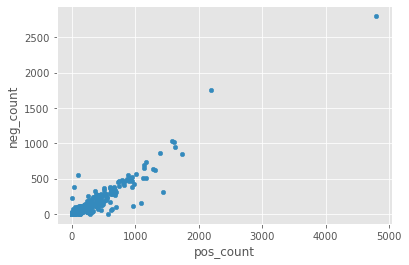

In [62]:
df_test = df[['pos_count','neg_count']]
df_test.plot.scatter(x = 'pos_count', y = 'neg_count')

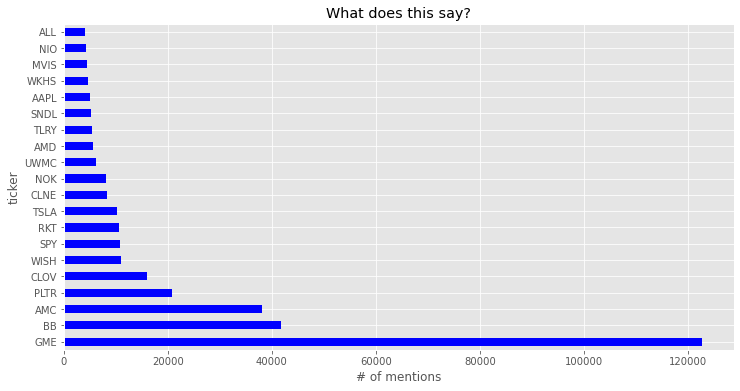

In [49]:
# making a chart off of num_mentions (above)
plt.figure(figsize = (12,6))
plt.title("What does this say?")
plt.xlabel('# of mentions')
df_num_mentions.head(20).plot(kind = 'barh', color = 'b')

In [34]:
#sort by pct_mentions rolled up into ticker
df_pct_mentions = df.sort_values(["pct_mentions","ticker"],ascending=False).groupby("ticker")
df_pct_mentions = df.groupby('ticker')['pct_mentions'].mean().sort_values(ascending=False)
df_pct_mentions.head(20)

#df_pct_mentions.to_csv('test.csv')

ticker
GME     0.165911
AMC     0.058821
NAPA    0.056667
BB      0.049852
CLOV    0.045179
PLTR    0.039604
SPY     0.037637
IRNT    0.035556
WISH    0.027882
SDC     0.026587
DOLE    0.025000
TSLA    0.022178
HOOD    0.021477
OPAD    0.020000
MVIS    0.018916
TMC     0.018611
MNMD    0.017564
CLNE    0.016797
RKT     0.016405
MVST    0.015000
Name: pct_mentions, dtype: float64

In [58]:
df_pct_mentions.value_counts()

<bound method Series.count of ticker
GME     0.165911
AMC     0.058821
NAPA    0.056667
BB      0.049852
CLOV    0.045179
          ...   
AUTO    0.005000
AUY     0.005000
URNM    0.005000
OTLY    0.005000
IO      0.005000
Name: pct_mentions, Length: 3739, dtype: float64>

In [44]:
#what is NAPA seems like an outlier with few data points
df[df.index == 'NAPA']

,date,url,num_mentions,pct_mentions,pos_count,neg_count,bullish_pct,bearish_pct,neutral_pct,price,price_change_net,price_change_pct,time_of_price
ticker,,,,,,,,,,,,,
NAPA,2021-03-23,https://finance.yahoo.com/quote/NAPA?p=NAPA,10,0.005,7,0,0.7,0.0,0.3,19.40,0.40,0.0211,At close: 4:00PM EDT
NAPA,2021-04-07,https://finance.yahoo.com/quote/NAPA?p=NAPA,1,0.005,1,0,1.0,0.0,0.0,17.54,0.02,0.0011,At close: 4:00PM EDT
NAPA,2021-07-16,https://finance.yahoo.com/quote/NAPA?p=NAPA,288,0.160,288,0,1.0,0.0,0.0,20.69,-0.68,-0.0316,As of 1:12PM EDT. Market open.


In [8]:
#sort by pos_count rolled up into ticker
df_pos_count =df.sort_values(["pos_count","ticker"],ascending=False).groupby("ticker")
df_pos_count = df.groupby('ticker')['pos_count'].sum().sort_values(ascending=False)
df_pos_count.head(20)

#df_pos_count.to_csv('test.csv')

ticker
GME     57609
BB      17018
AMC     16999
PLTR     8497
WISH     7928
CLOV     5964
RKT      5233
TSLA     4434
SPY      4033
CLNE     3651
UWMC     3128
NOK      3075
AMD      2974
TLRY     2351
MVIS     1995
WKHS     1968
APHA     1941
SNDL     1859
CLF      1763
NIO      1643
Name: pos_count, dtype: int64

In [9]:
#sort by neg_count rolled up into ticker
df_neg_count =df.sort_values(["neg_count","ticker"],ascending=False).groupby("ticker")
df_neg_count = df.groupby('ticker')['neg_count'].sum().sort_values(ascending=False)
df_neg_count.head(20)

#df_neg_count.to_csv('test.csv')

ticker
GME     32026
AMC      8611
BB       7202
PLTR     4758
SPY      3128
CLOV     2654
TSLA     2554
RKT      2518
ALL      1552
NOK      1478
NIO      1270
CLNE     1242
UWMC     1211
AMD      1189
WISH     1185
AAPL      976
SNDL      967
BABA      934
MVIS      906
TLRY      840
Name: neg_count, dtype: int64

In [13]:
# created function to produce simple stock charts
def stock_chart(csv):
    
    #read file and convert into datetime
    df_temp = pd.read_csv(csv)
    df_temp['Date'] = pd.to_datetime(df_temp['Date'])
    
    #plot graph
    x=df_temp['Date']
    y=df_temp['Close']
    plt.xlabel('Date')
    plt.ylabel('Price')
    
    return plt.plot(x,y)

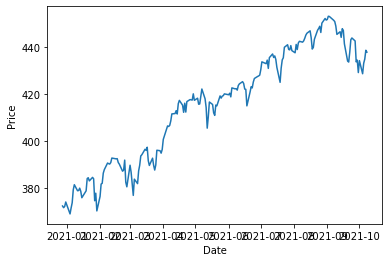

In [14]:
stock_chart('SPY.csv')

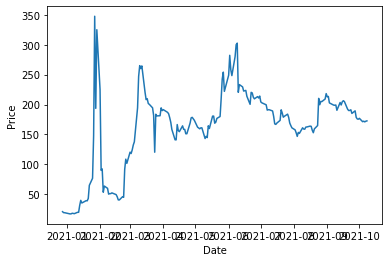

In [15]:
stock_chart('GME.csv')

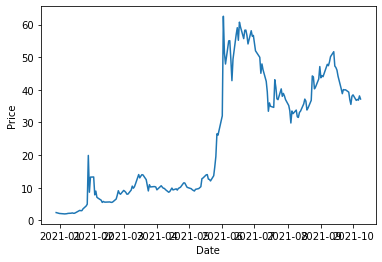

In [16]:
stock_chart('AMC.csv')

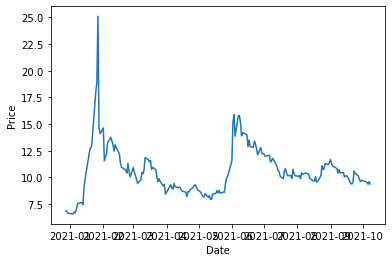

In [17]:
stock_chart('BB.csv')